<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/slicing/brain_level_img_slice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import nibabel as nib
import random
import glob
from matplotlib.gridspec import GridSpec
import numpy as np
from sklearn.cluster import KMeans
from skimage import morphology

munted the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


adding the two paths DATATSET_PATH is the path for the dot level images and other image is an old image form our pervious dataset.

In [ ]:
DATASET_PATH = r"/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/dot-level-img" +"/"

In [ ]:
UPENN_IMG = r"/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data/UPENN-GBM-Patients-00001-slice075_z.nii"

fetching the images ids of the dot-level-images

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(DATASET_PATH)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
len(training_data_ids)

24

In [ ]:
start_y = 200
end_y = 700
target_size = (240, 240)

the below function is created to adjust the dot level image into our required  position so we have used an pervious image and crop the dot level images into the shape and size of pervious dataset image

In [ ]:
def augmentation(image_data):
  rotated_img = cv2.rotate(image_data, cv2.ROTATE_90_COUNTERCLOCKWISE)
  #crop to required position
  cropped_img = rotated_img[start_y:end_y, :]
  #resize to targeted size
  resized_img = cv2.resize(cropped_img, target_size)
  return resized_img

the below funcion is where we have try to remove the skull form the dot level images but we have a problem every images are not able to be adjusted in the same manner.

<ipython-input-100-e26e8d87ac98>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10, 5))


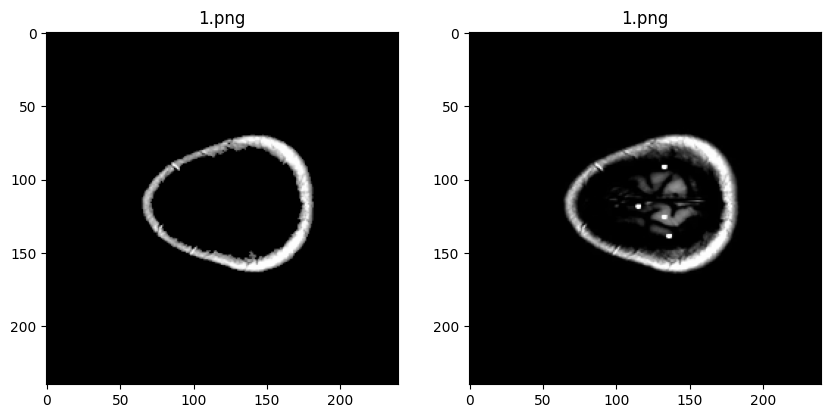

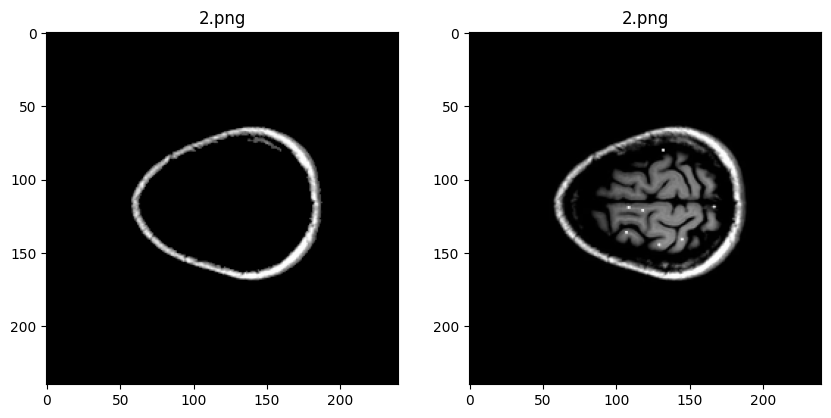

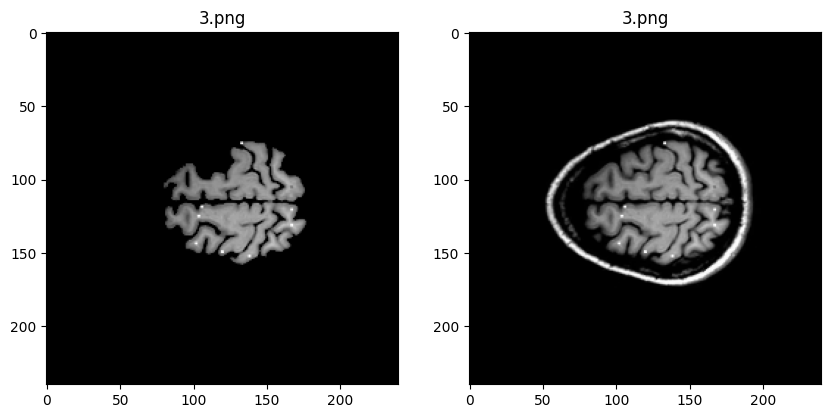

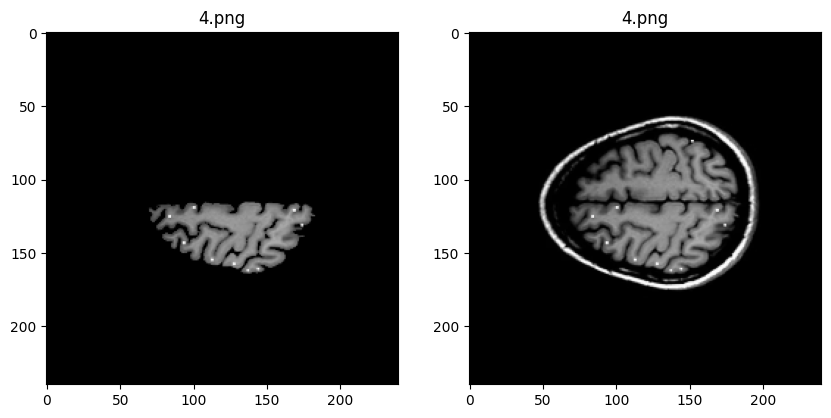

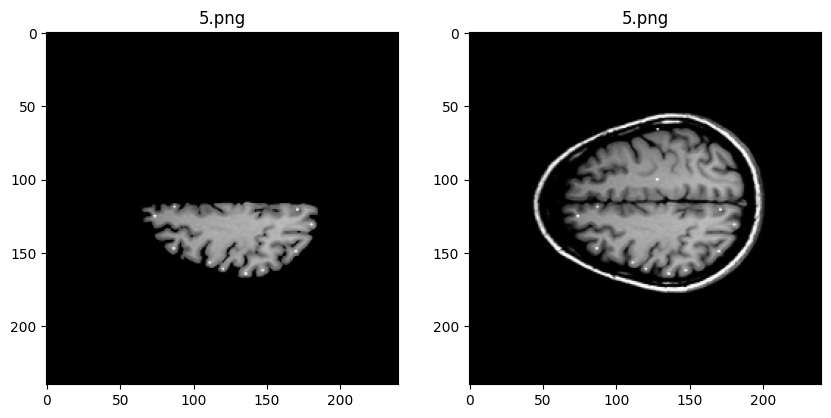

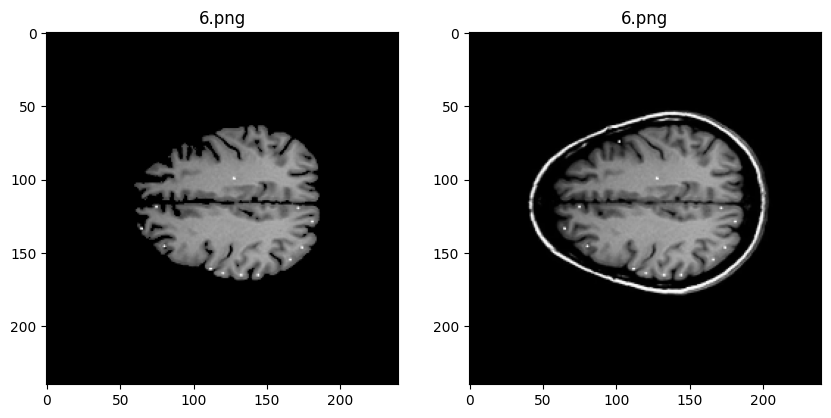

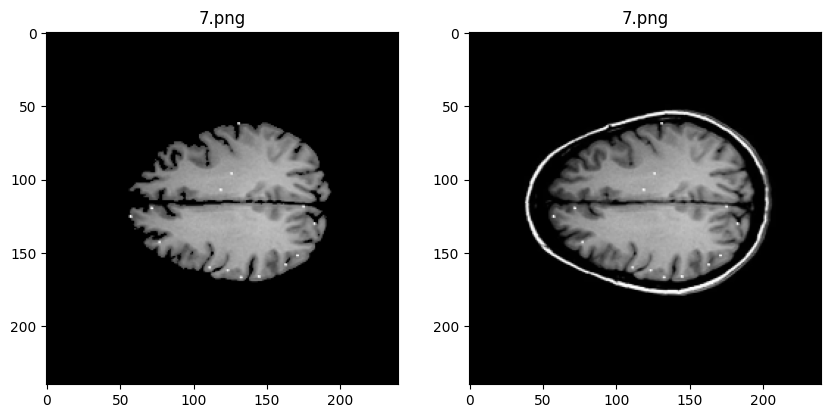

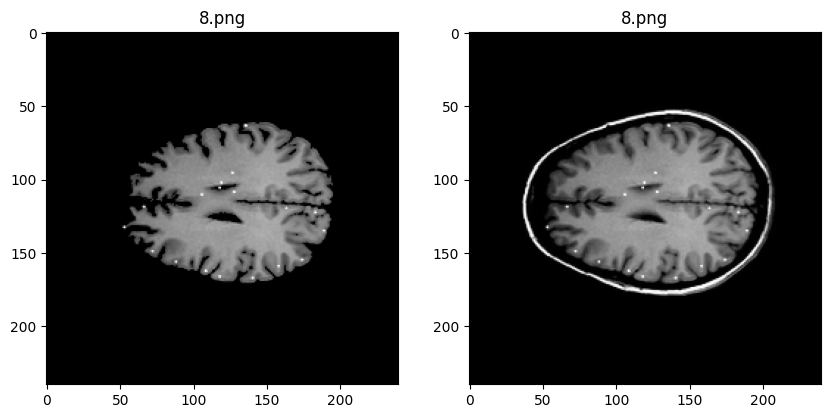

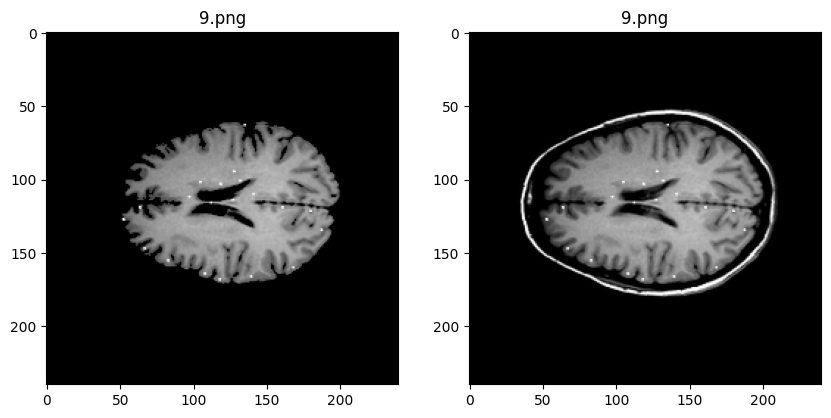

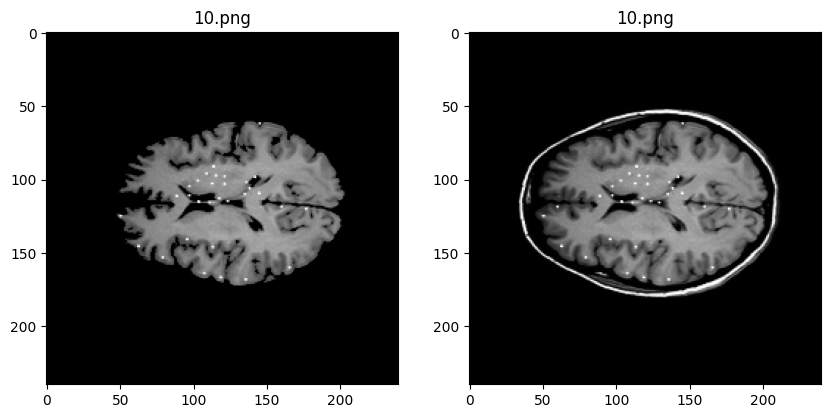

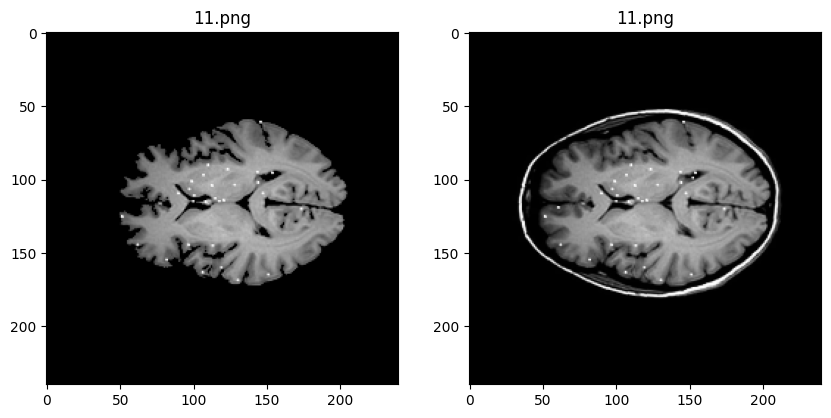

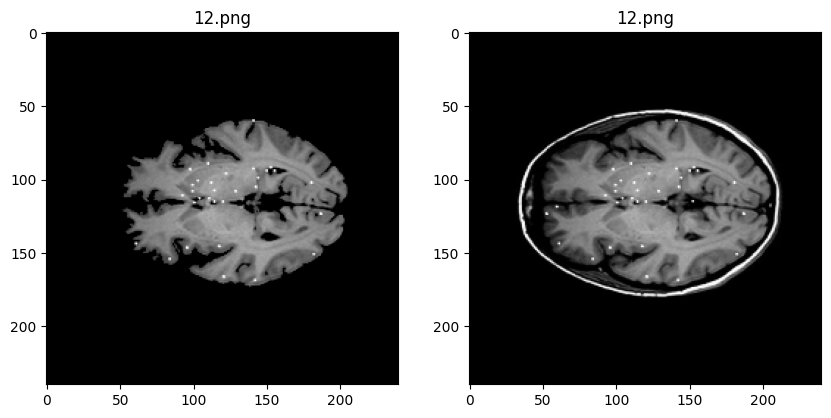

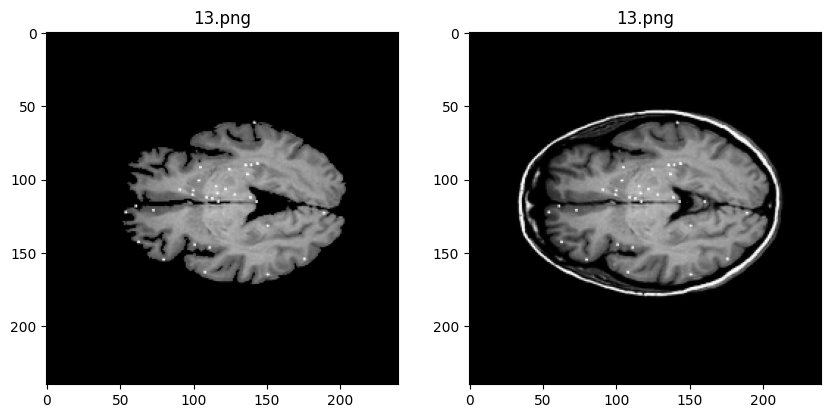

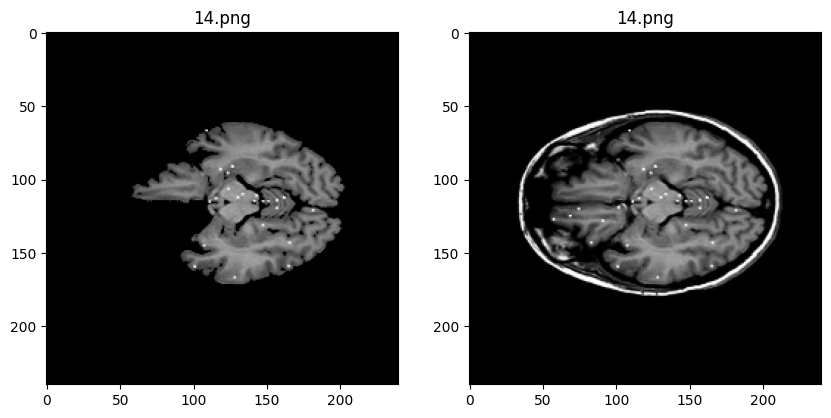

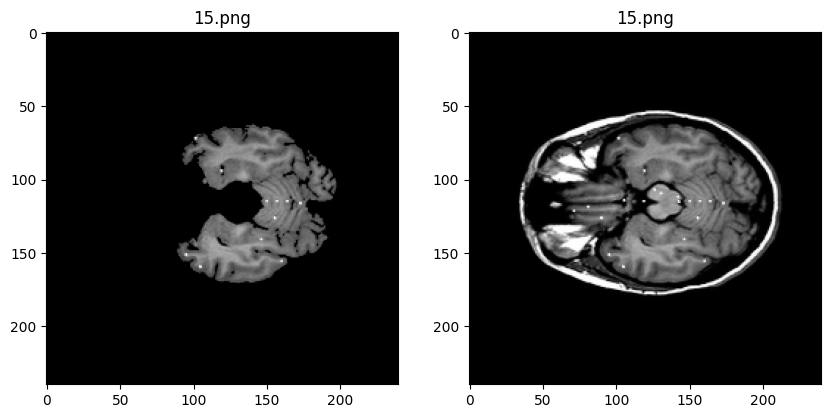

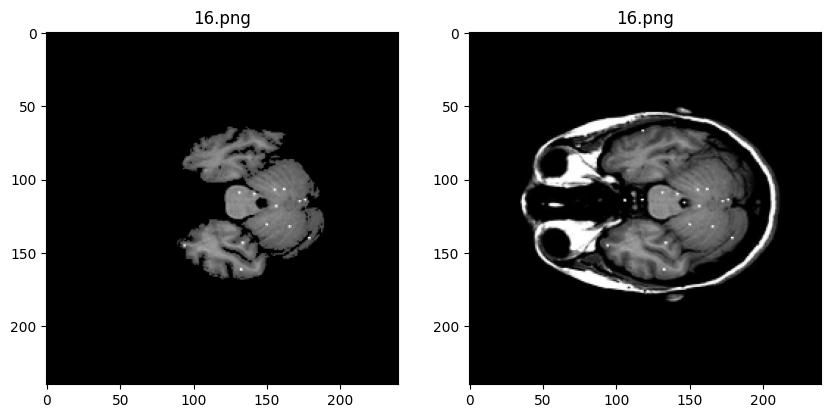

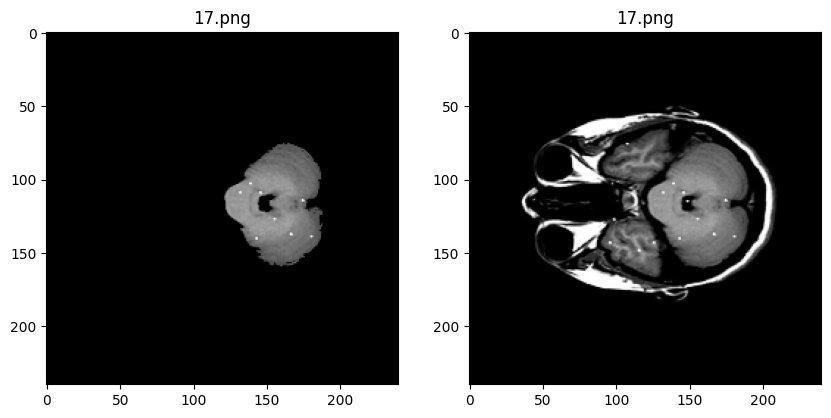

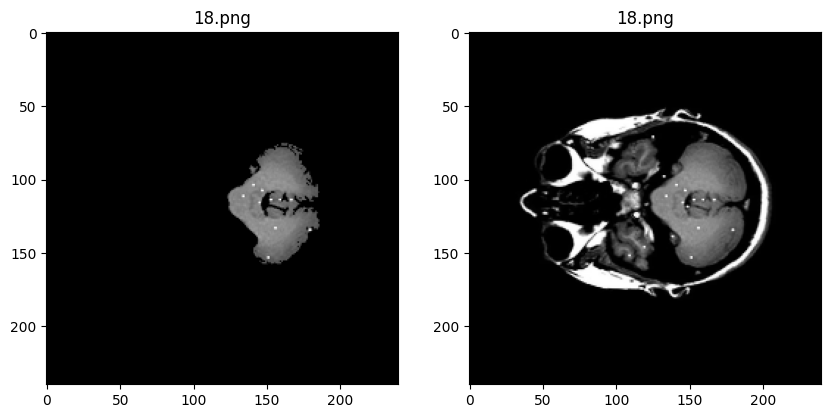

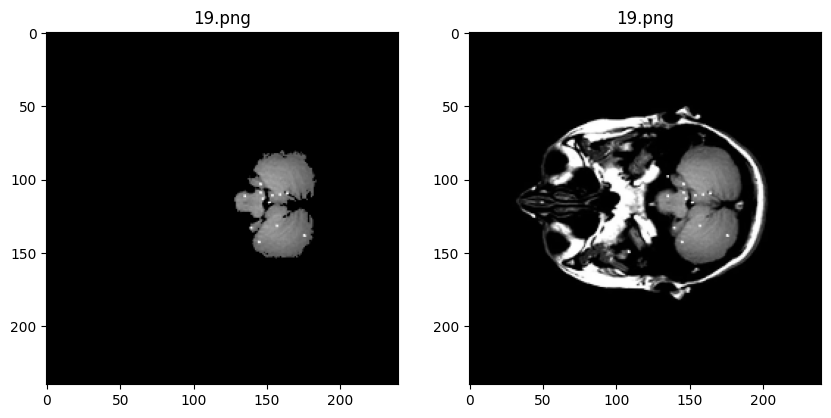

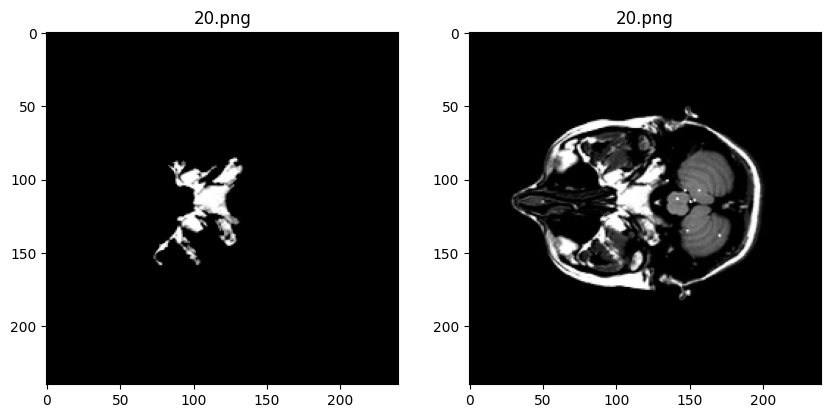

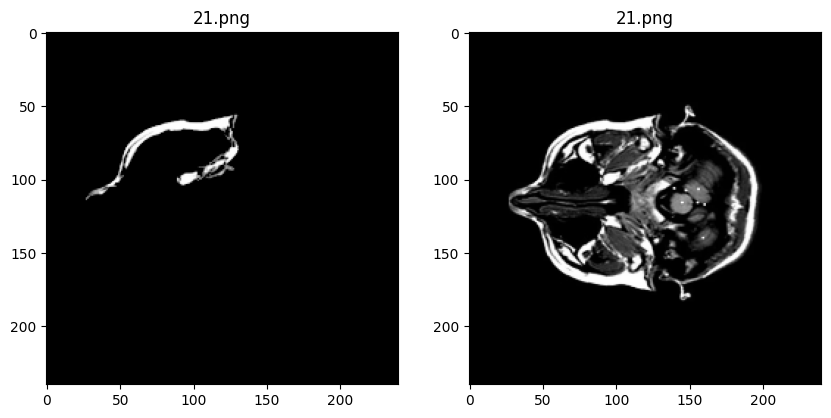

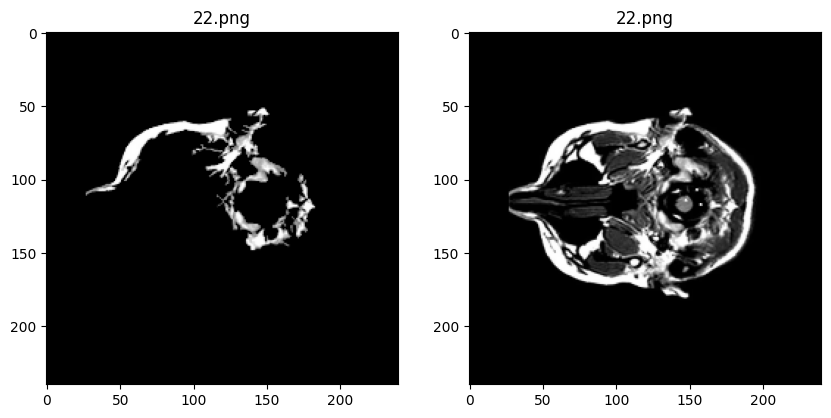

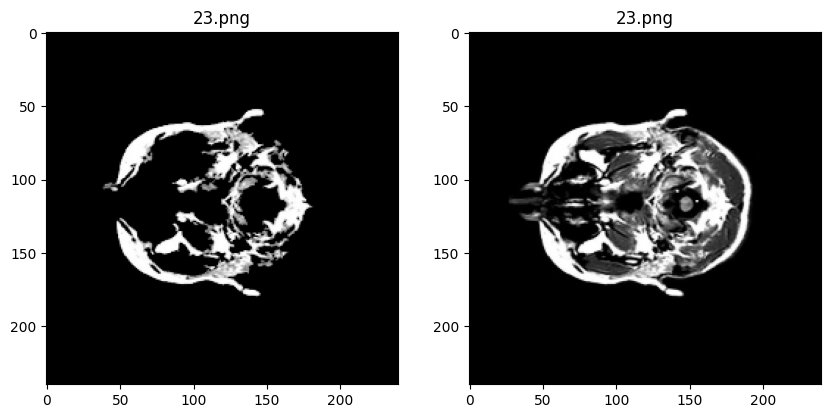

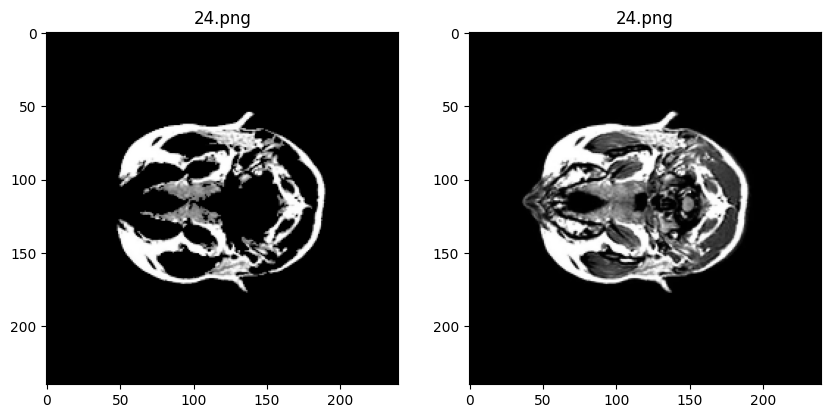

In [ ]:
for i in range(len(training_data_ids)):
  input_path = DATASET_PATH + training_data_ids[i]
  img = cv2.imread(input_path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
  #Creates a color mask based on the thresholded image. The mask is a three-channel image with non-zero pixels in red, making it suitable for visualization.
  colormask = np.zeros(img.shape, dtype=np.uint8)
  colormask[thresh!=0] = np.array((0,0,255))
  #Blends the original image with the color mask.
  blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
  #Performs connected component labeling on the thresholded image (thresh). The resulting markers contain labels for connected components.
  ret, markers = cv2.connectedComponents(thresh)
  #Get the area taken by each component. Ignore label 0 since this is the background.
  marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
  #Get label of largest component by area
  largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above
  #Get pixels which correspond to the brain
  brain_mask = markers==largest_component
  brain_out = img.copy()
  #In a copy of the original image, clear those pixels that don't correspond to the brain
  brain_out[brain_mask==False] = (0,0,0)
  #save the image
  #output_path_req = output_path + training_data_ids[i]
  #cv2.imwrite(output_path_req, resized_img)
  fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10, 5))
  ax1.imshow(augmentation(brain_out), cmap = 'gray')
  ax1.set_title(f'{training_data_ids[i]}')
  ax2.imshow(augmentation(img), cmap = 'gray')
  ax2.set_title(f'{training_data_ids[i]}')


the following block of code is similar to previous one but here we have successfully remove the skull part of each images my adjusting each images seperately

Text(0.5, 1.0, 'Image4')

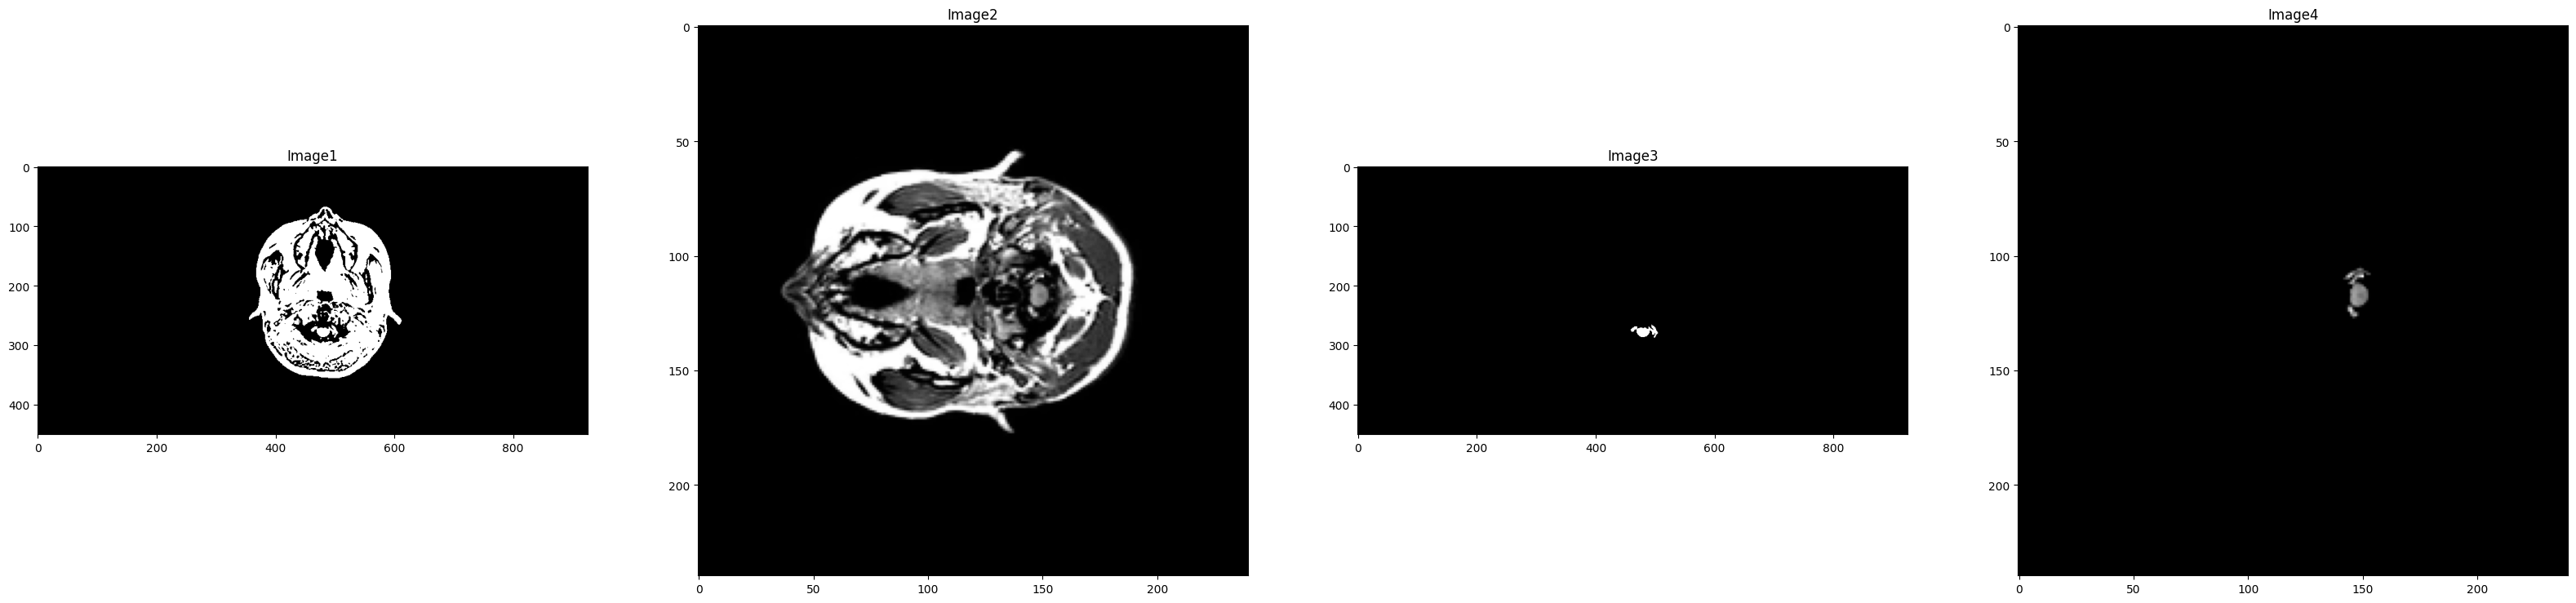

In [ ]:
path = DATASET_PATH + training_data_ids[23]
img           = cv2.imread(path)
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)

ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above
#Get pixels which correspond to the brain
brain_mask1 = markers == 15

#brain_mask2 = np.where(brain_mask2==0,1,0)
brain_mask = brain_mask1
brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (40,20))
ax1.imshow(thresh, cmap = 'gray')
ax1.set_title('Image1')
ax2.imshow(augmentation(gray), cmap = 'gray')
ax2.set_title('Image2')
ax3.imshow(brain_mask1, cmap = 'gray')
ax3.set_title('Image3')
ax4.imshow(augmentation(brain_out), cmap = 'gray')
ax4.set_title('Image4')

Save the image into the drive

In [ ]:
output_path = '/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/level finished images/24.png'

# Save the image
cv2.imwrite(output_path, augmentation(brain_out))

True

In [ ]:
len(marker_area)

49

the below block of code where each seperated components of the images are printed and with its corresponding index so that we can add that perticular part into our brain mask and get our corresponding brian without skull

In [ ]:
for i in range(len(marker_area)):
  mask = markers == i
  fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
  ax1.imshow(mask, cmap = 'gray')
  ax1.set_title(f'{i}')

In [ ]:
len(marker_area)

46

After saving and done our work we have print all the image to check every images are saved accordingly

<ipython-input-306-88cc15867677>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (10,5))


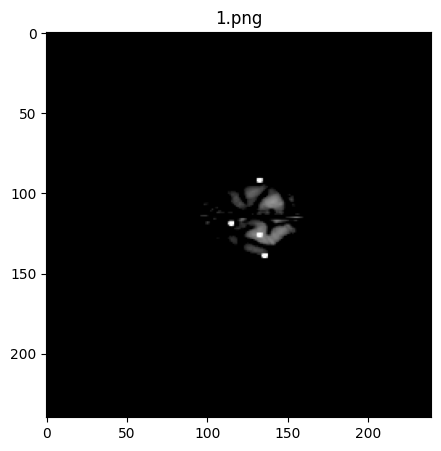

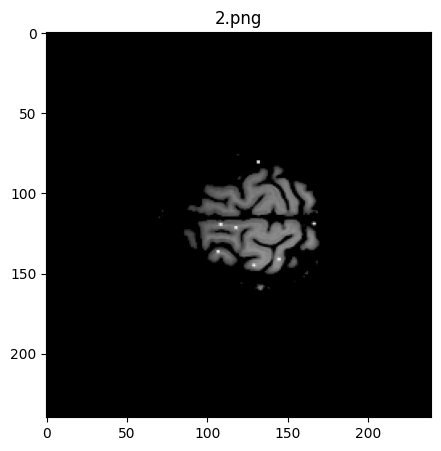

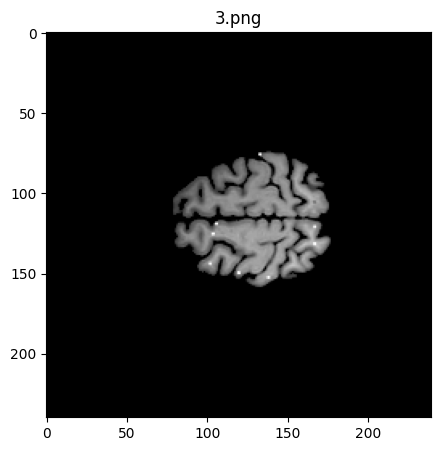

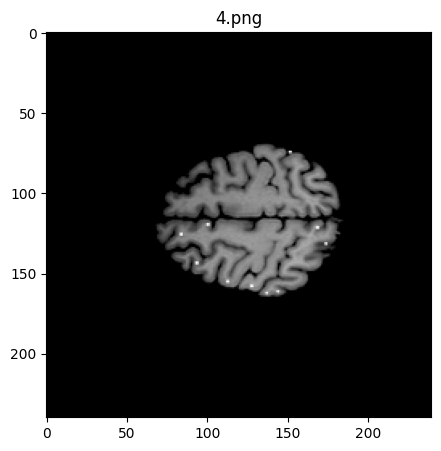

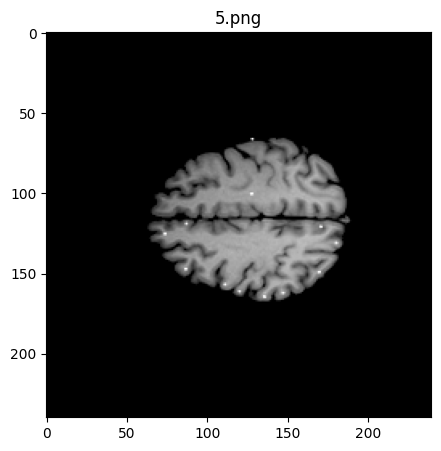

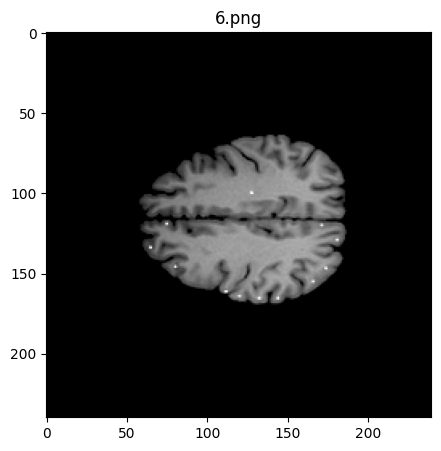

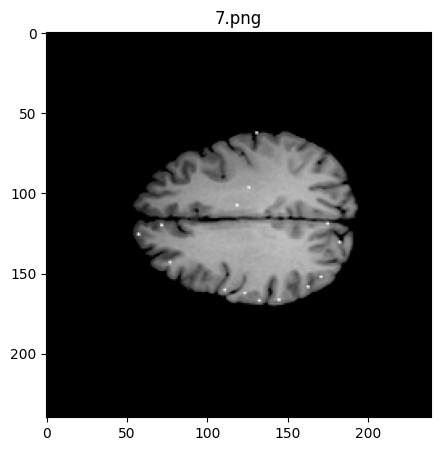

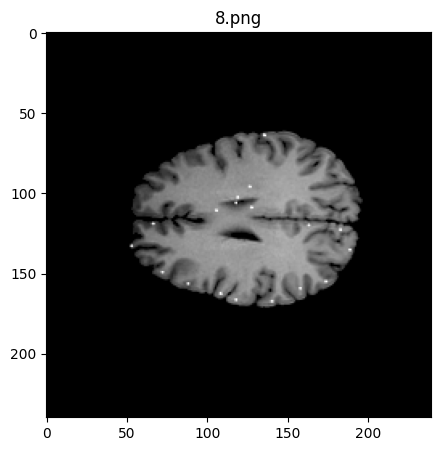

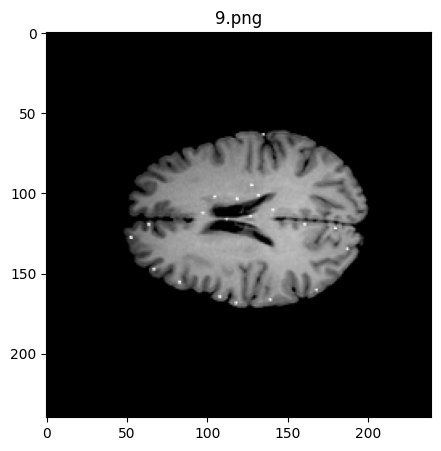

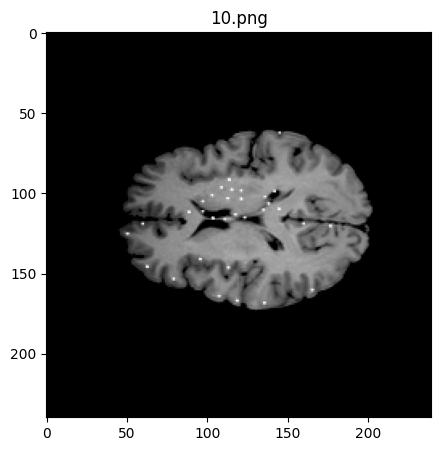

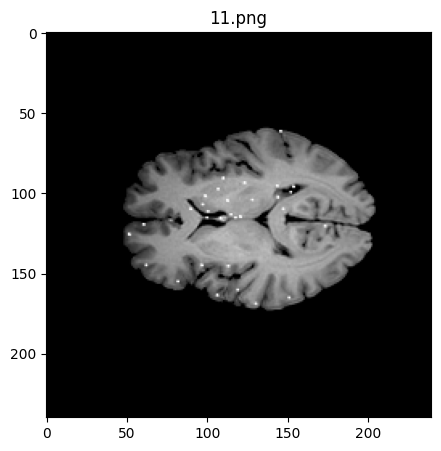

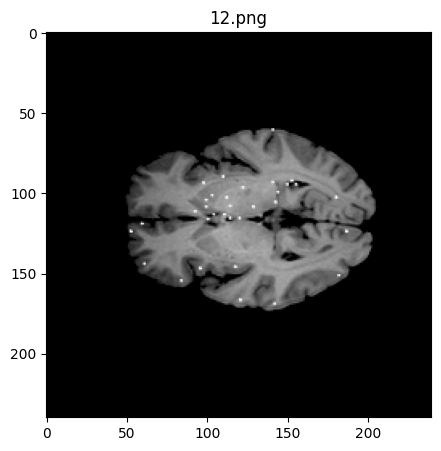

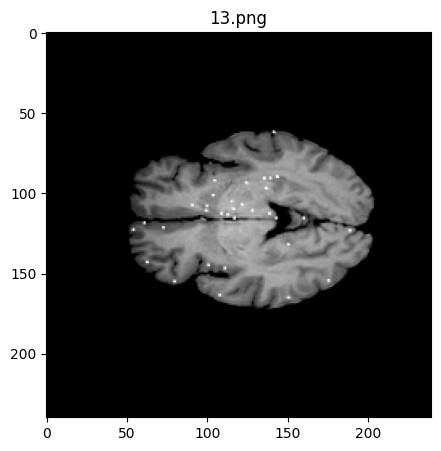

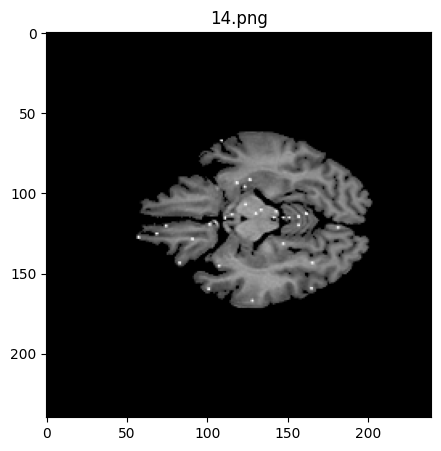

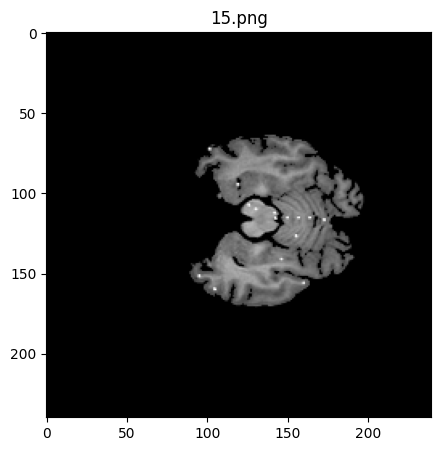

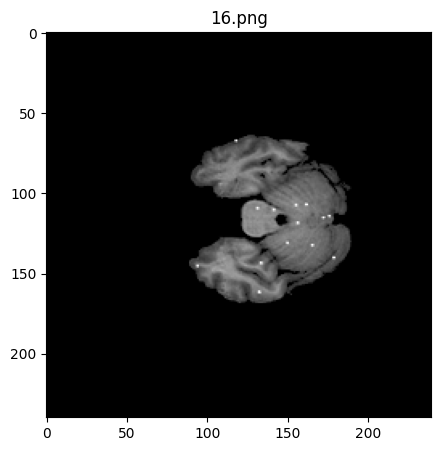

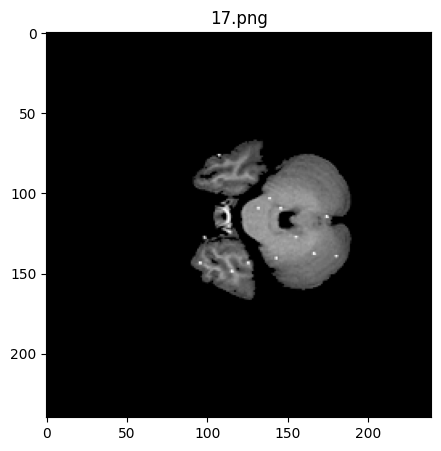

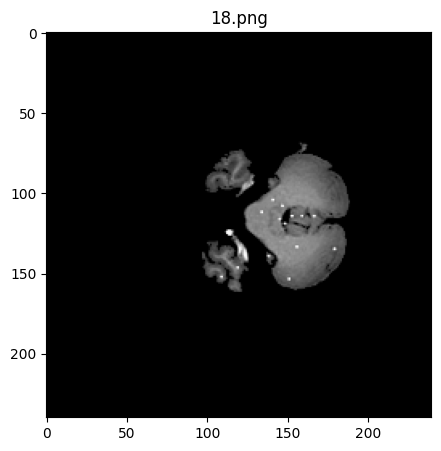

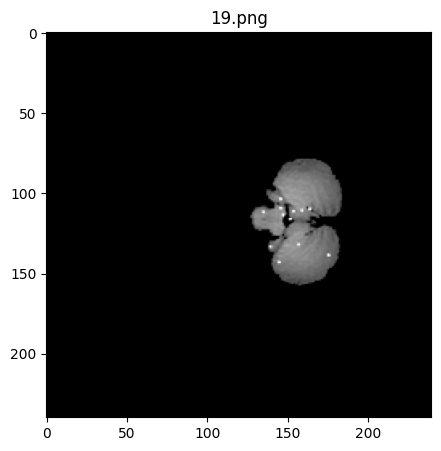

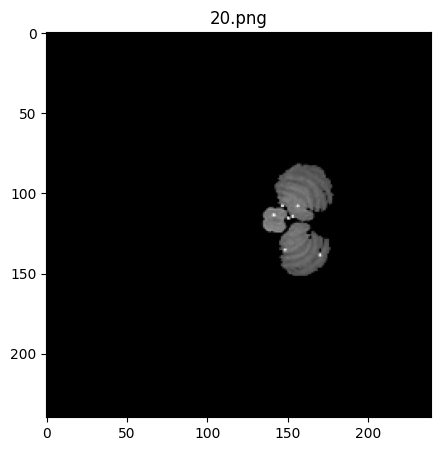

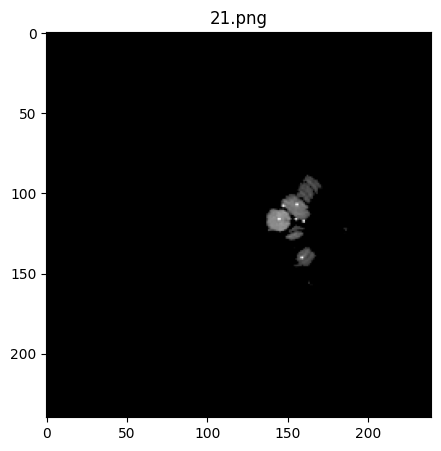

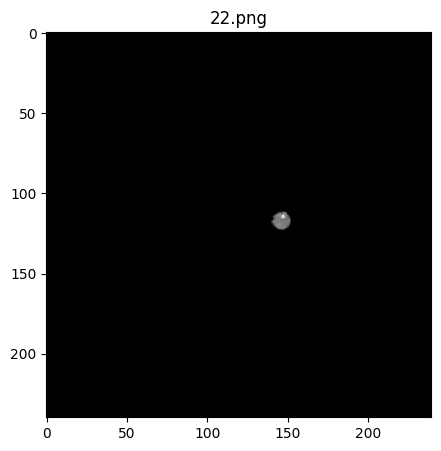

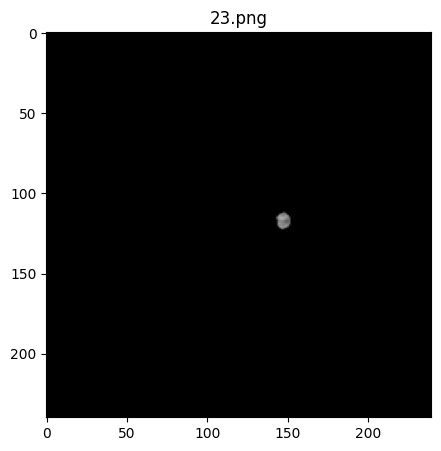

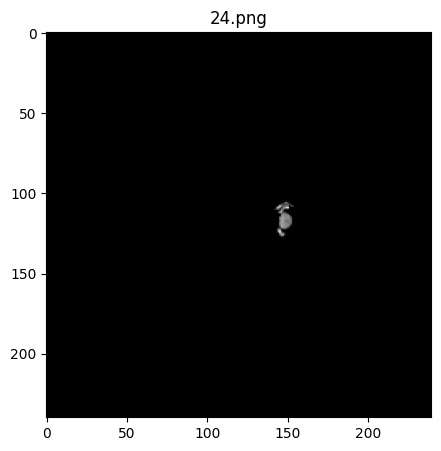

In [ ]:
path3 = r"/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/level finished images"+"/"

for i in range(len(training_data_ids)):
  path4 = path3 + training_data_ids[i]
  fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
  ax1.imshow(cv2.imread(path4), cmap = 'gray')
  ax1.set_title(f'{training_data_ids[i]}')